In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

In [2]:
df=pd.read_csv('student_perf.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- There are no null values nor duplicate rows

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('There are {} numerical features:'.format(len(numeric_features)), numeric_features)
print('There are {} categorical features:'.format(len(categorical_features)), categorical_features)

There are 3 numerical features: ['math_score', 'reading_score', 'writing_score']
There are 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [10]:
print("Categories in 'gender' are:", df['gender'].unique(),'\n')
print(df['gender'].value_counts(),'\n')

print("Categories in 'race_ethnicity' are:", df['race_ethnicity'].unique(),'\n')
print(df['race_ethnicity'].value_counts(),'\n')

print("Categories in 'parental_level_of_education' are:", df['parental_level_of_education'].unique(),'\n')
print(df['parental_level_of_education'].value_counts(),'\n')

print("Categories in 'lunch' are:", df['lunch'].unique(),'\n')
print(df['lunch'].value_counts(),'\n')

print("Categories in 'test_preparation_course' are:", df['test_preparation_course'].unique(),'\n')
print(df['test_preparation_course'].value_counts(),'\n')

Categories in 'gender' are: ['female' 'male'] 

gender
female    518
male      482
Name: count, dtype: int64 

Categories in 'race_ethnicity' are: ['group B' 'group C' 'group A' 'group D' 'group E'] 

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64 

Categories in 'parental_level_of_education' are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64 

Categories in 'lunch' are: ['standard' 'free/reduced'] 

lunch
standard        645
free/reduced    355
Name: count, dtype: int64 

Categories in 'test_preparation_course' are: ['none' 'completed'] 

test_preparation_course
none         642
completed    358
Name: count, dtype: int64 



- There are 3 numerical features and 5 categorical features
- The Gender data is mostly balanced

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- The means of all scores are close to each other (66 - 69)
- All standard deviations are close as well (14.6 - 15.19)
- Minimum for Math_score is 0, where as for reading_ is 17 and writing_ is 10 (Both much better than Math scores)

In [12]:
#Adding Total_Score and Average_Score Columns
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=np.round(df['total_score']/3,2)

#df=df.drop(columns=['Total_Score', 'Average_Score'])

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [14]:
math_full=df[df['math_score']==100]['total_score'].count()
reading_full=df[df['reading_score']==100]['total_score'].count()
writing_full=df[df['writing_score']==100]['total_score'].count()
overall_full=df[df['average_score']==100]['total_score'].count()

In [15]:
print(f'No. of students with full marks in Maths: {math_full}')
print(f'No. of students with full marks in Reading: {reading_full}')
print(f'No. of students with full marks in Writing: {writing_full}')
print(f'No. of students with 100% average: {overall_full}')

No. of students with full marks in Maths: 7
No. of students with full marks in Reading: 17
No. of students with full marks in Writing: 14
No. of students with 100% average: 3


In [16]:
#Assuming 33 is the passing marks
reading_fail = df[df['reading_score'] <= 33]['average_score'].count()
writing_fail = df[df['writing_score'] <= 33]['average_score'].count()
math_fail = df[df['math_score'] <= 33]['average_score'].count()

print(f'No. of students with less than 33 marks in Maths: {math_fail}')
print(f'No. of students with less than 33 marks in Writing: {writing_fail}')
print(f'No. of students with less than 33 marks in Reading: {reading_fail}')

No. of students with less than 33 marks in Maths: 20
No. of students with less than 33 marks in Writing: 14
No. of students with less than 33 marks in Reading: 11


### Visualization

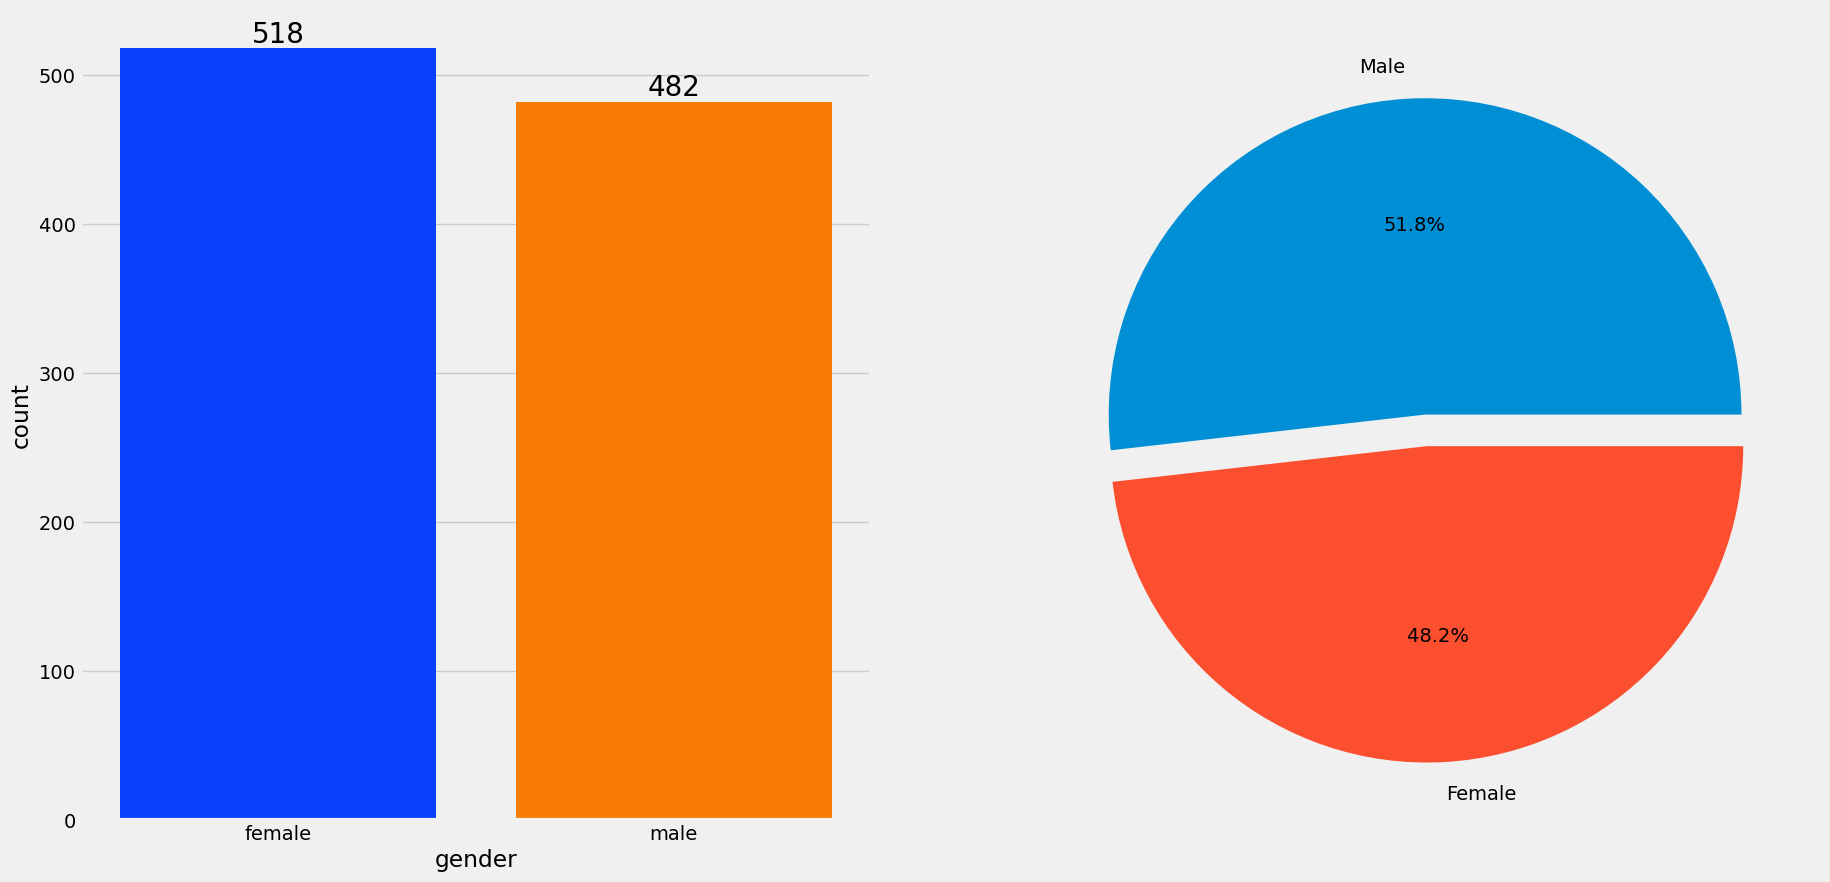

In [80]:
##Underrstanding distribution across all categories

#GENDER
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%.1f%%', textprops={'fontsize': 14})
plt.show()

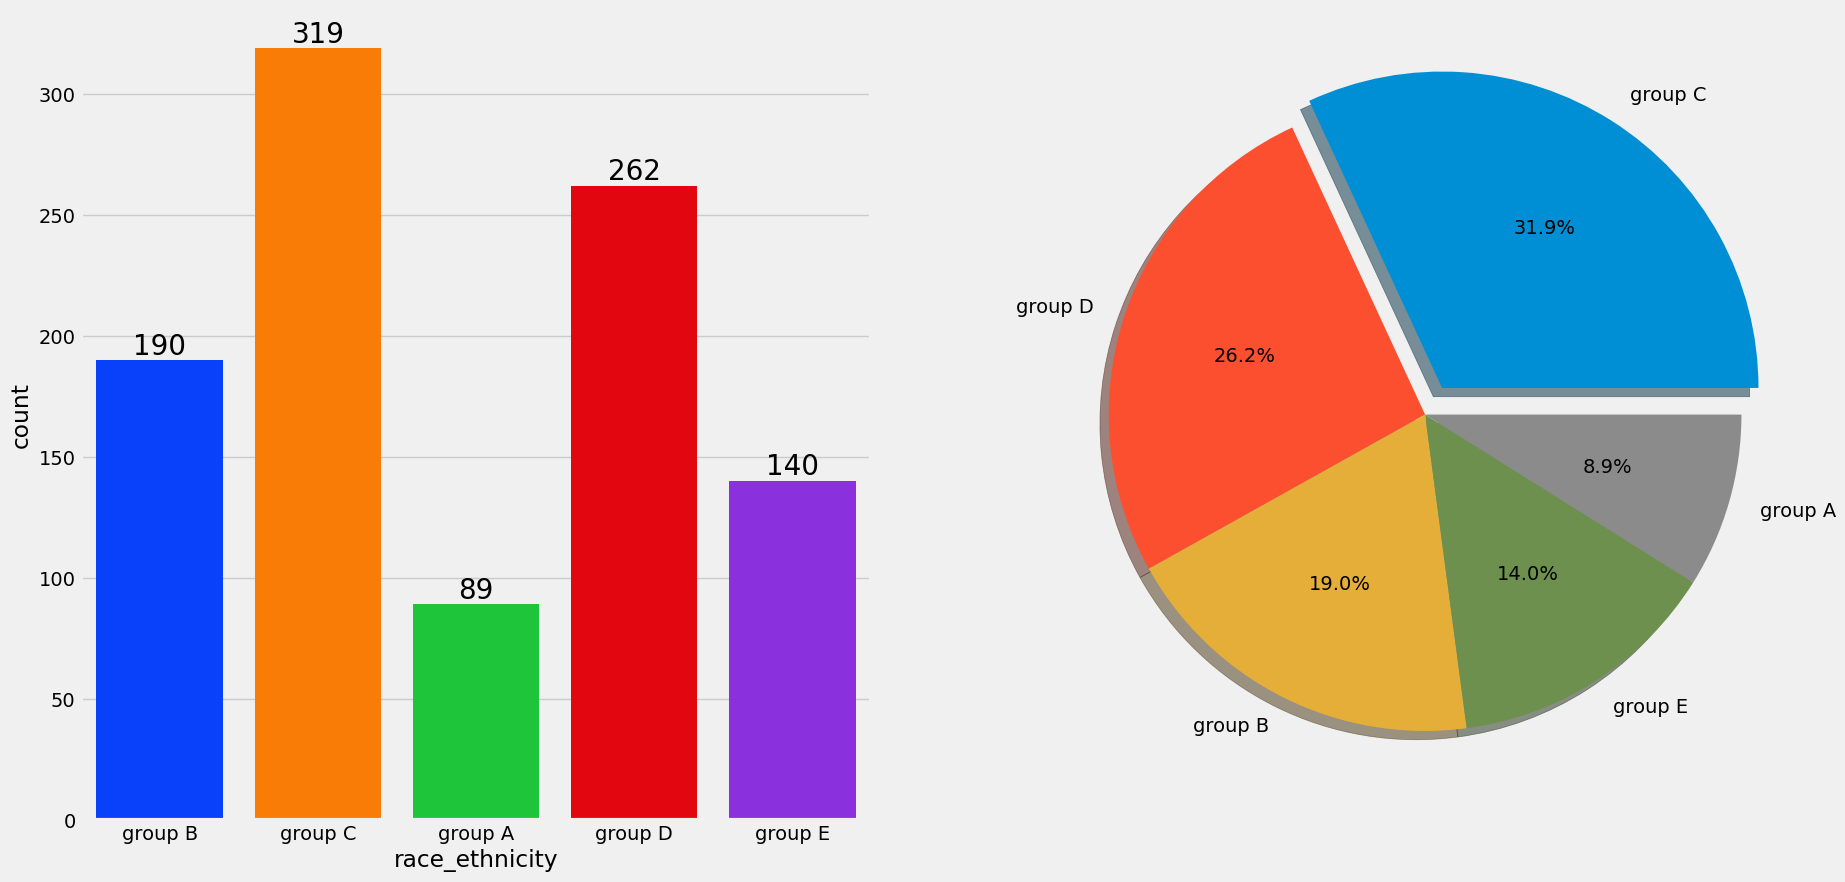

In [77]:
#RACE ETHINICITY
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%.1f%%',shadow=True,
        textprops={'fontsize': 14})
plt.show()   

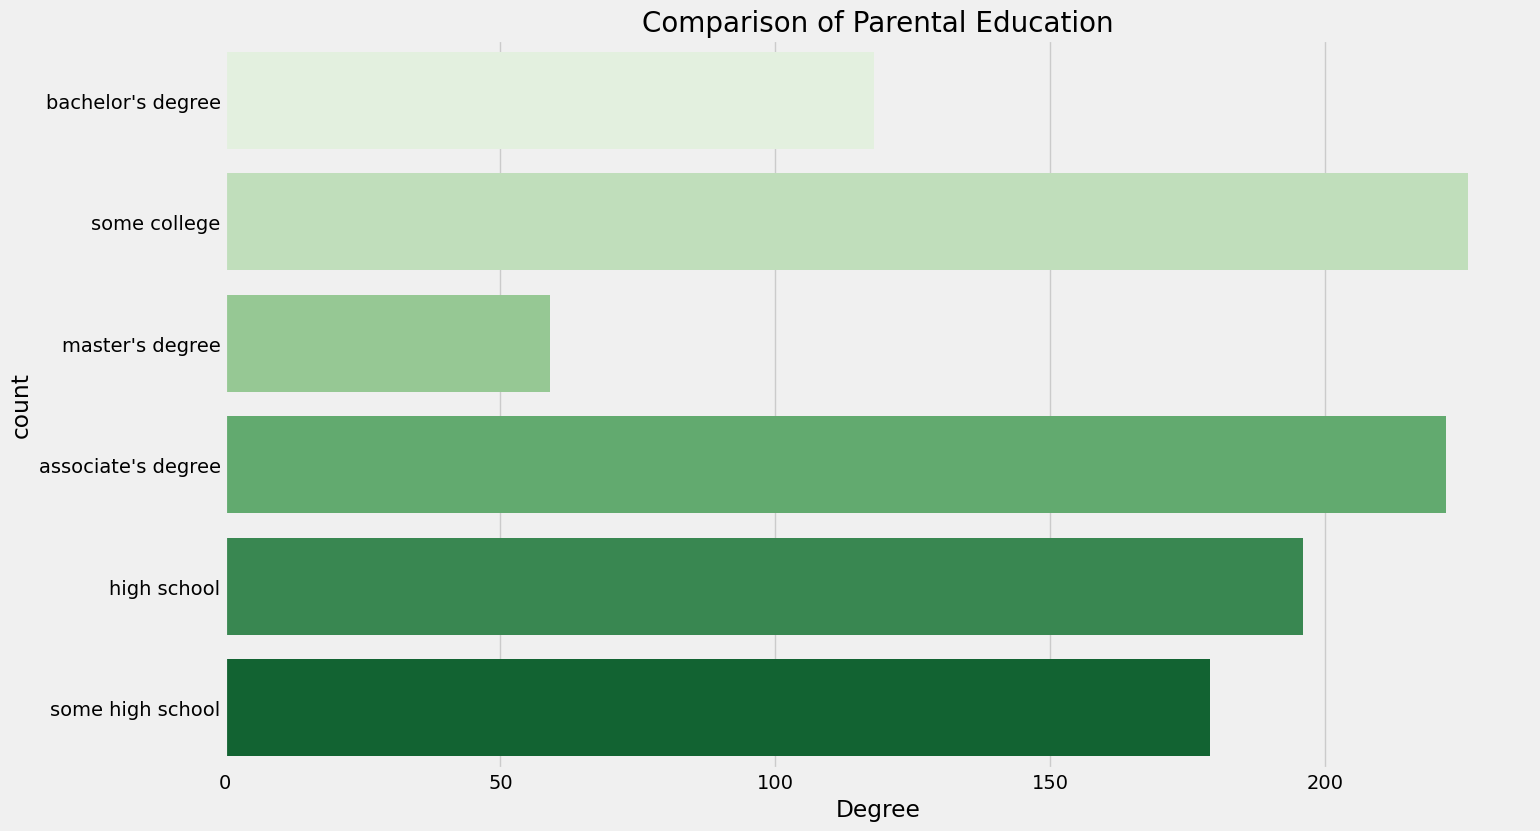

In [76]:
#PARENTAL EDUCATION
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Greens')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

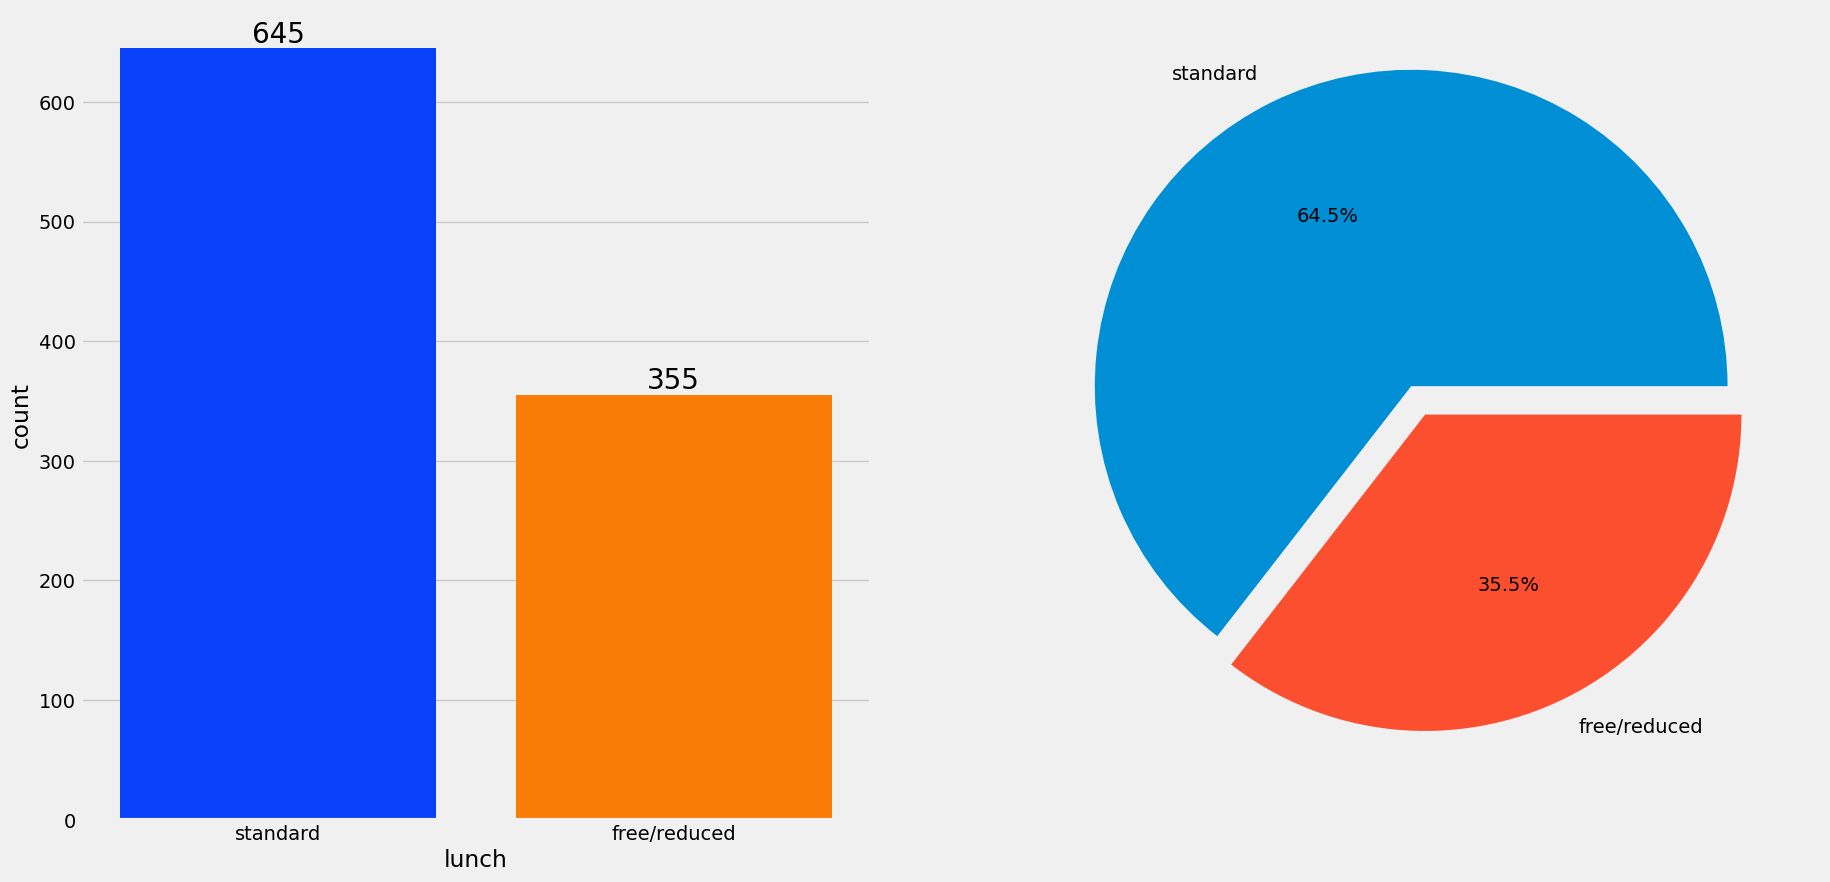

In [140]:
#LUNCH
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['lunch'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)


    
plt.pie(x = df['lunch'].value_counts(),labels=df['lunch'].value_counts().index,explode=[0.1,0],autopct='%.1f%%', textprops={'fontsize': 14})
plt.show()   

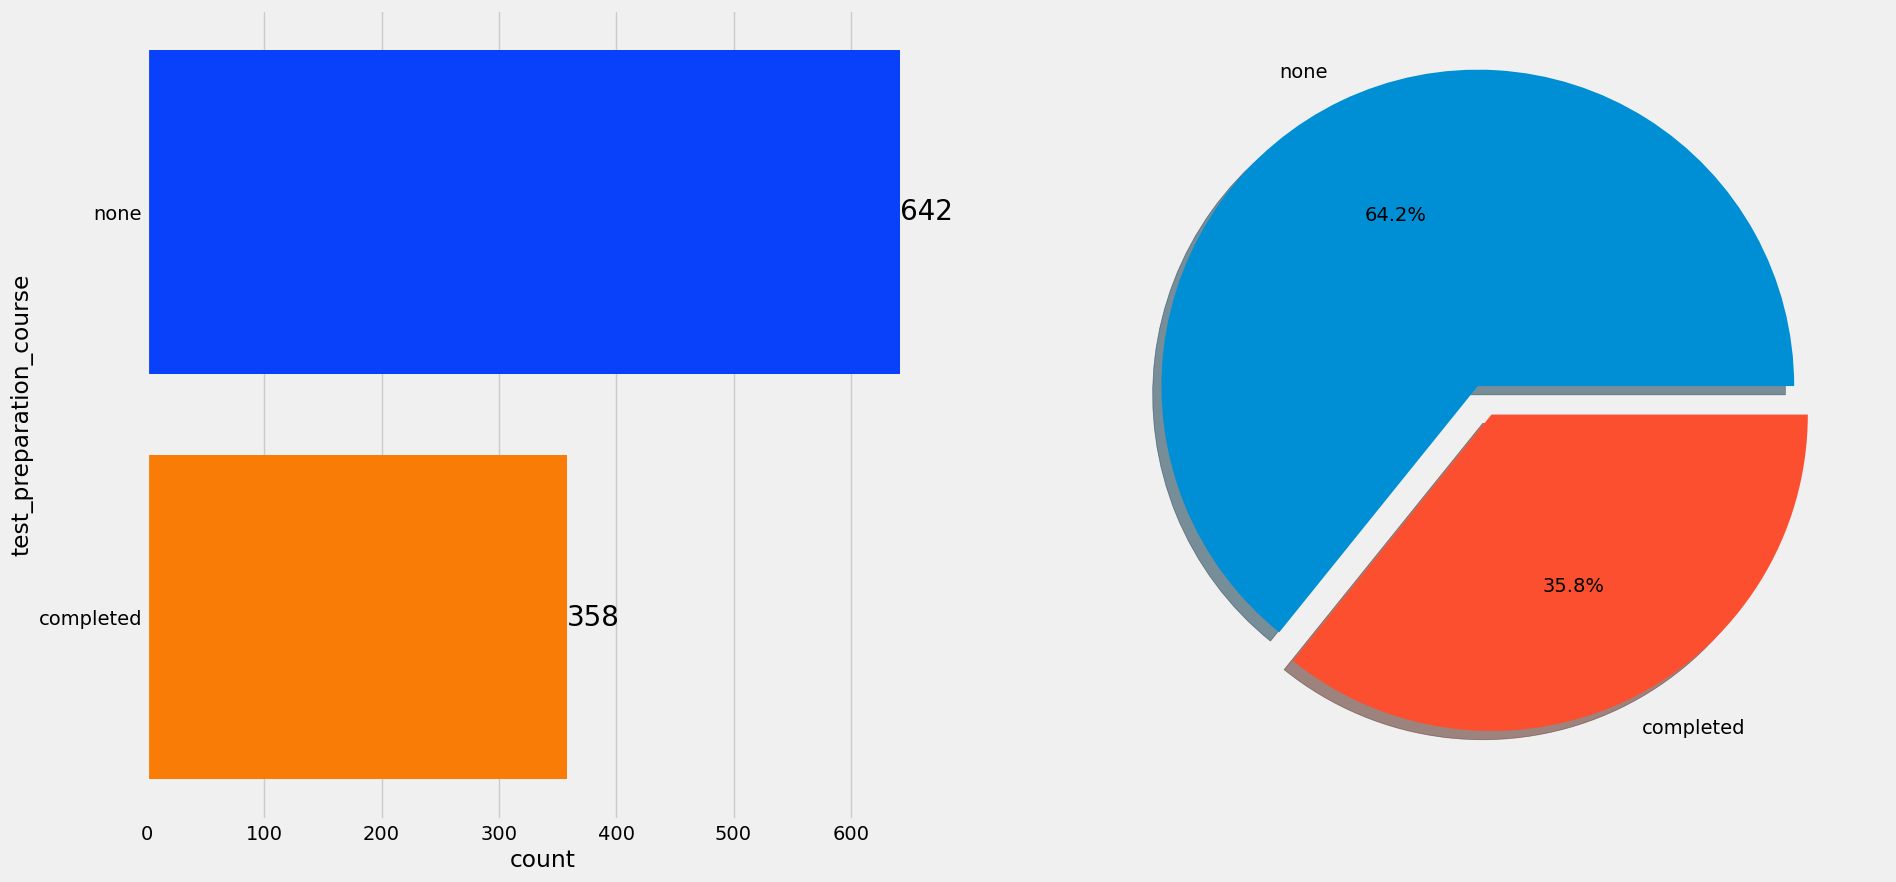

In [82]:
#TEST COURSE
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(df['test_preparation_course'], palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['test_preparation_course'].value_counts(),labels=df['test_preparation_course'].value_counts().index,explode=[0.1,0],autopct='%.1f%%',shadow=True,
        textprops={'fontsize': 14})
plt.show()   

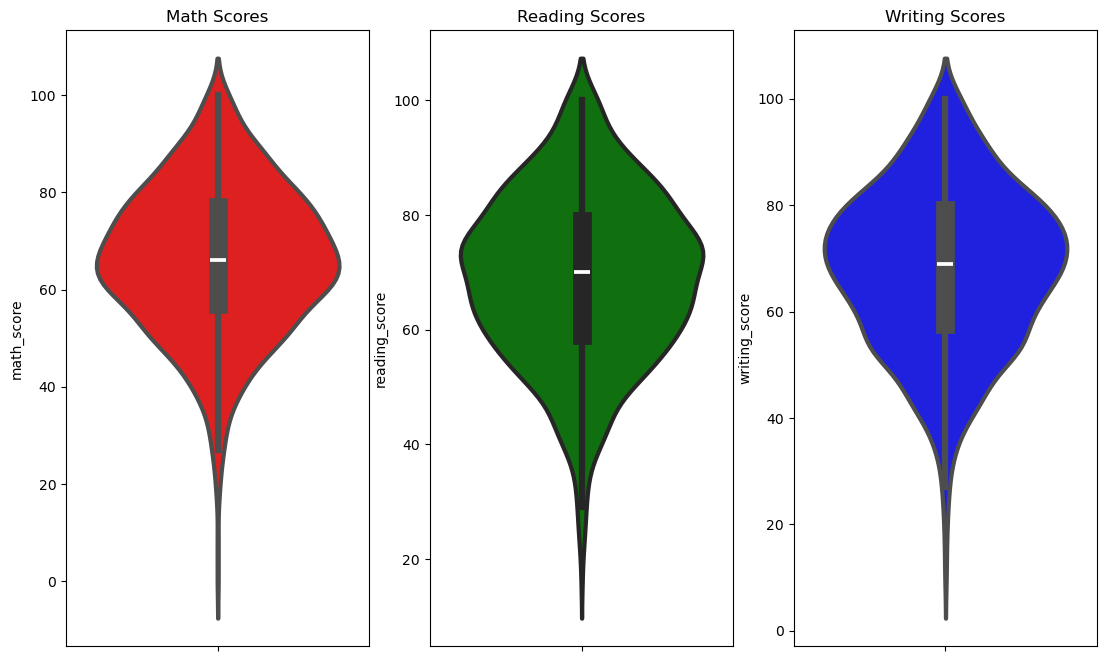

In [39]:
#Maximumum score of students in all three subjects
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Math Scores')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Reading Scores')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Writing Scores')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Understanding Performace wrt various factors

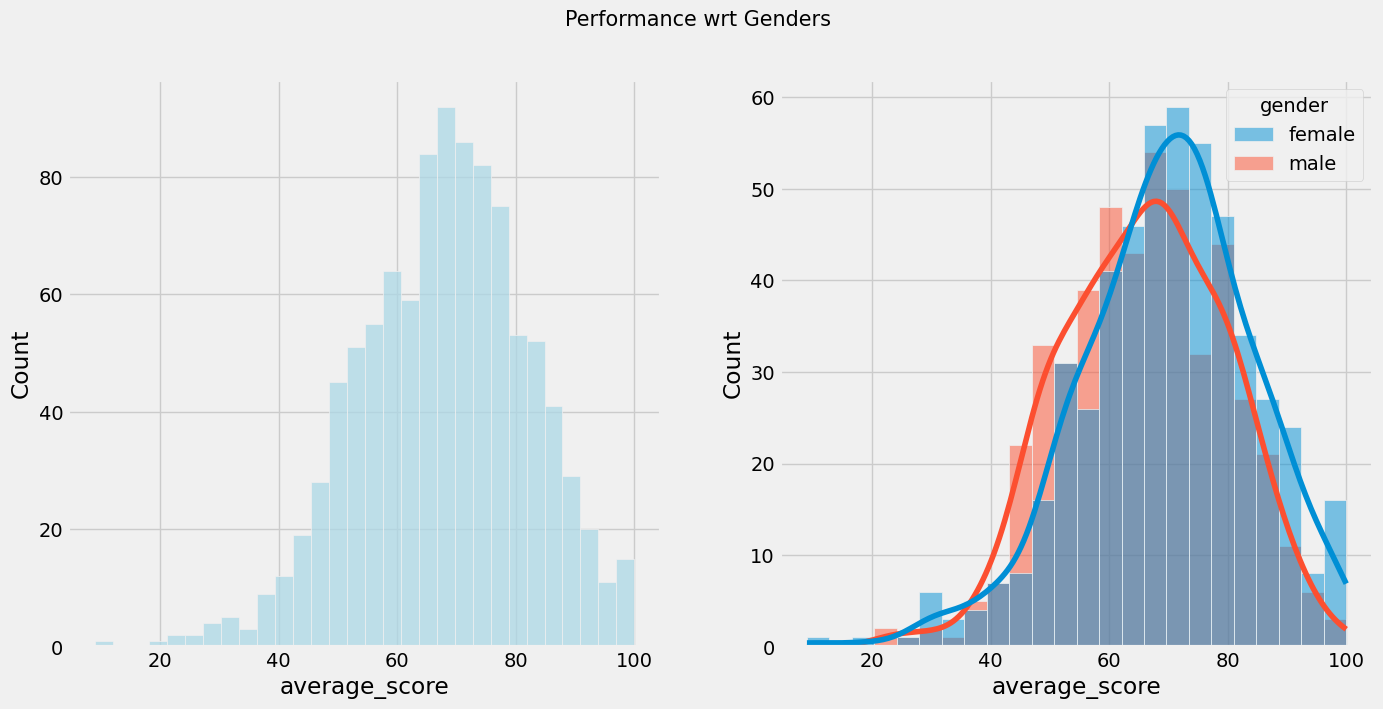

In [132]:
#Gender Vs Average_Scores
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df,x='average_score',bins=30, color='lightblue', ax=axs[0])
sns.histplot(data=df,x='average_score',kde=True,hue='gender', ax=axs[1])
plt.suptitle("Performance wrt Genders", fontsize=15)
plt.show()

In [103]:
gender_math_avg = df.groupby('gender')['math_score'].mean()
gender_tot_avg = df.groupby('gender')['average_score'].mean()

In [150]:
gender_tot_avg

gender
female    69.569498
male      65.837303
Name: average_score, dtype: float64

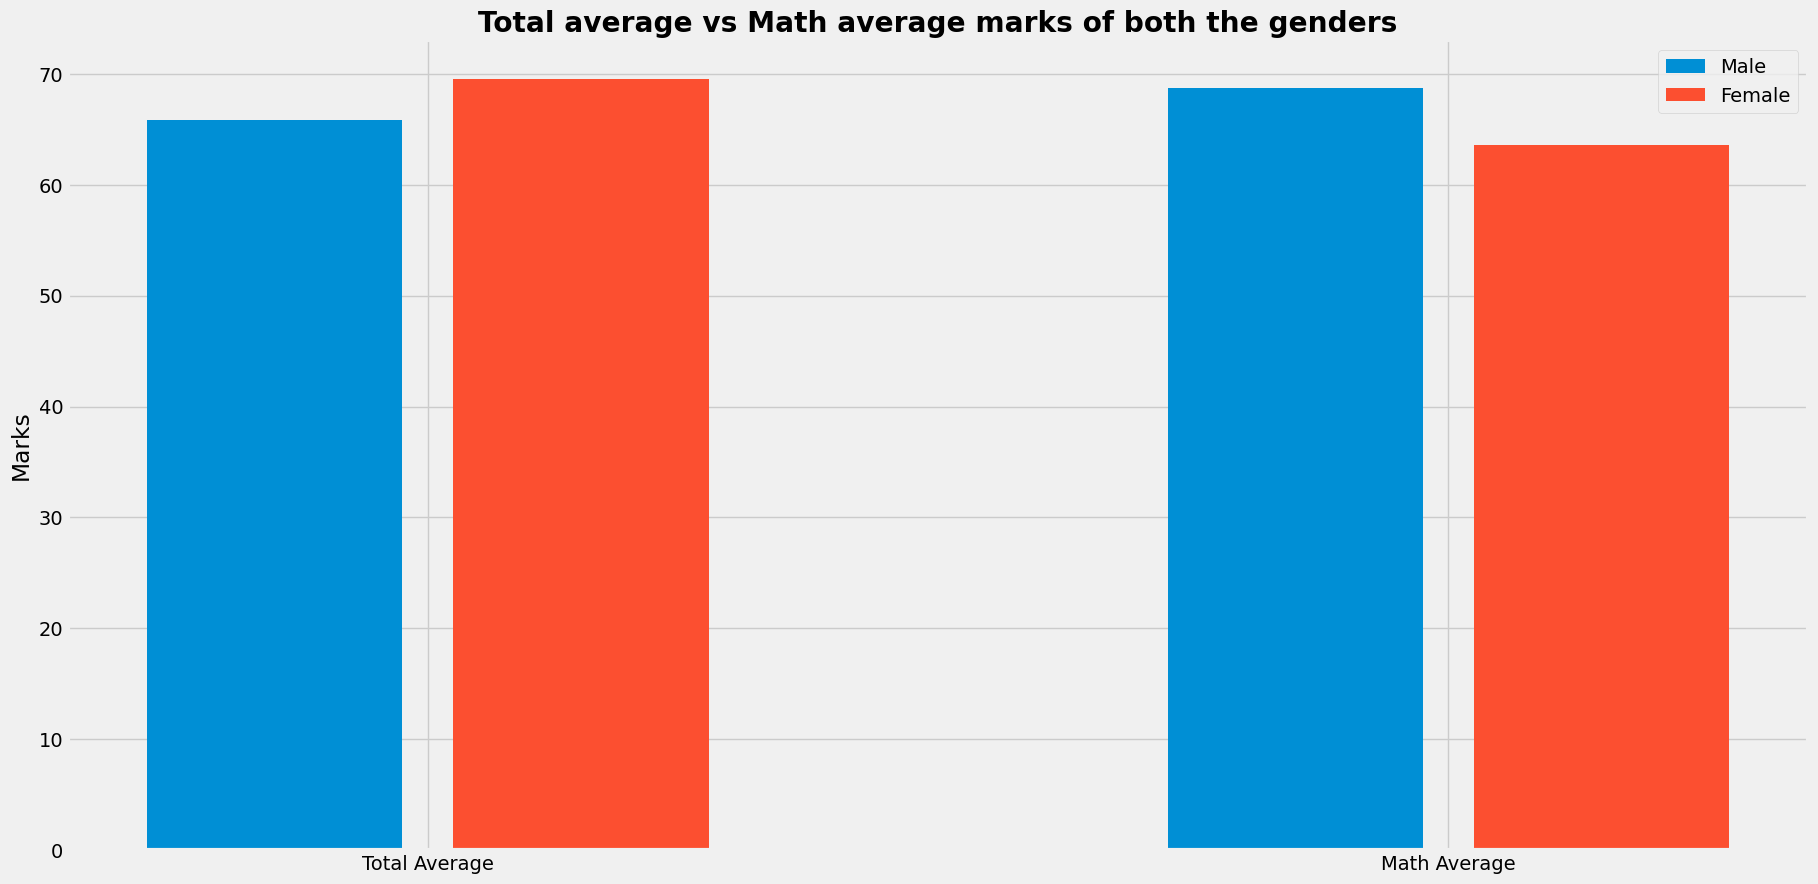

In [216]:
plt.figure(figsize=(20,10))

X = ['Total Average','Math Average']


female_scores = [gender_tot_avg[0], gender_math_avg[0]]
male_scores = [gender_tot_avg[1], gender_math_avg[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.15, male_scores, 0.25, label = 'Male')
plt.bar(X_axis + 0.15, female_scores, 0.25, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

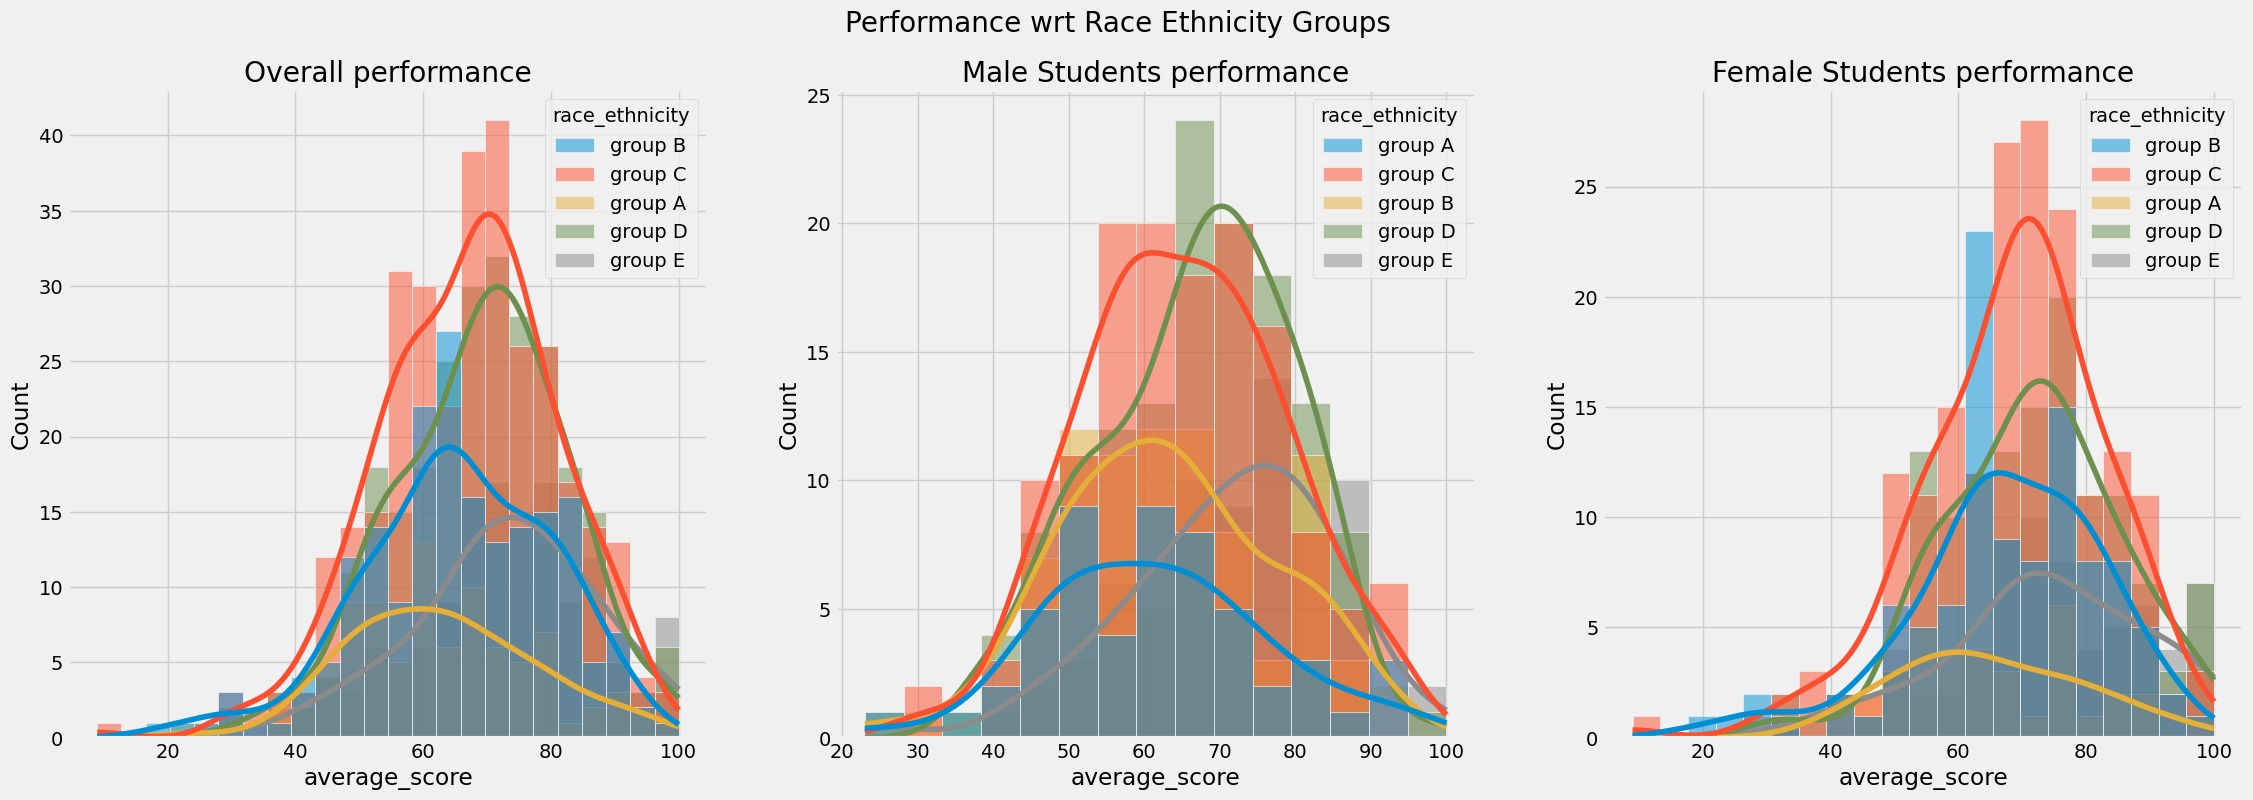

In [138]:
#Race Ethnicity Vs Average_Scores
fx, axs= plt.subplots(1,3,figsize=(25,8))
sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity', ax=axs[0])
axs[0].set_title('Overall performance')

sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity', ax=axs[1])
axs[1].set_title('Male Students performance')

ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity', ax=axs[2])
axs[2].set_title('Female Students performance')

plt.suptitle("Performance wrt Race Ethnicity Groups", fontsize=20)
plt.show()

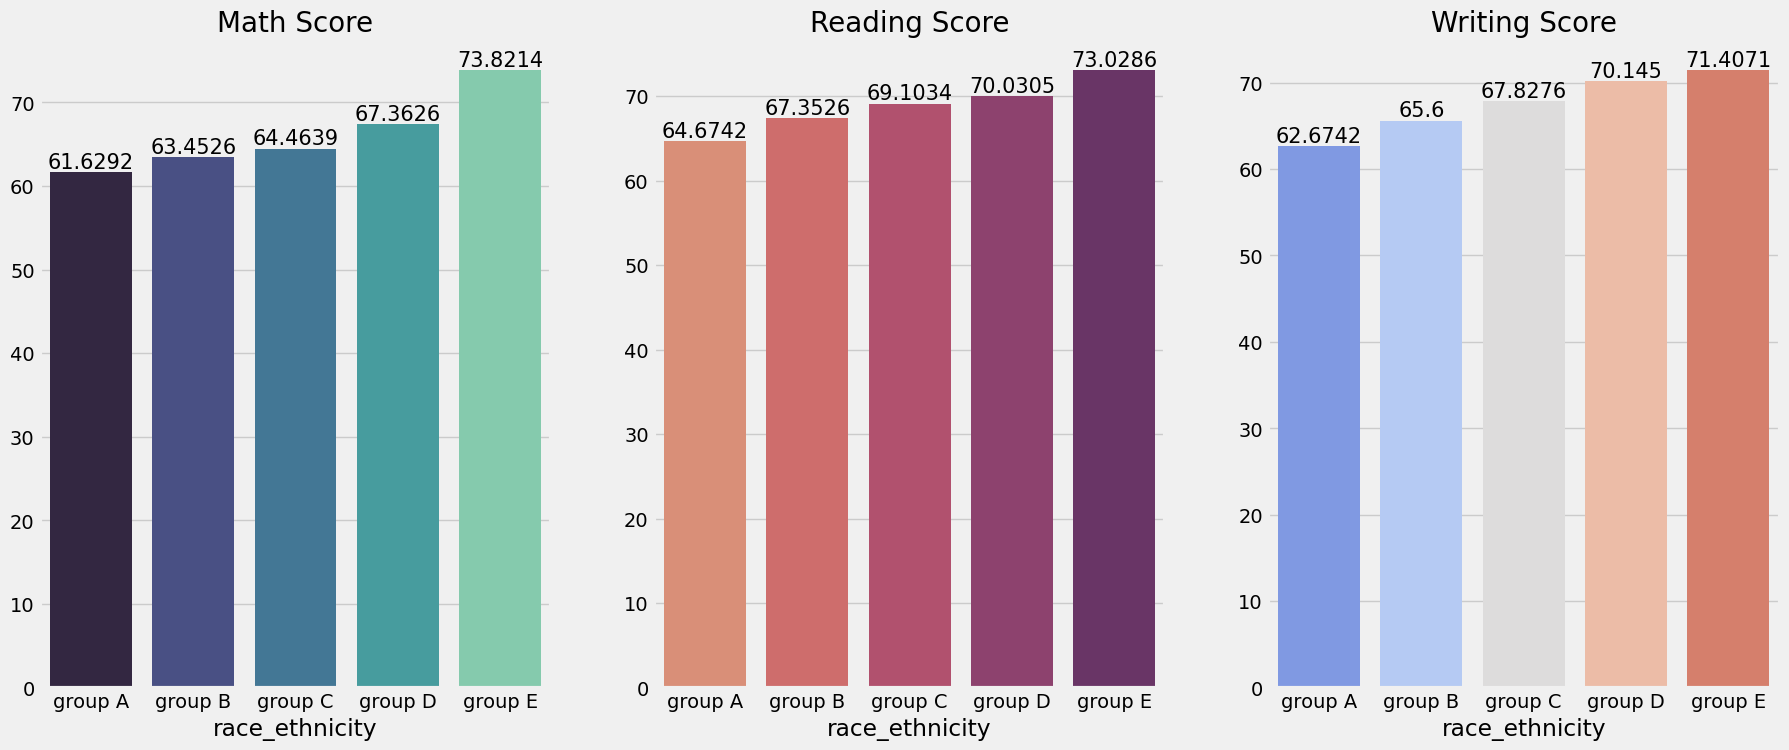

In [159]:
race_grp=df.groupby('race_ethnicity')

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_grp['math_score'].mean().index,y=race_grp['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math Score',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=race_grp['reading_score'].mean().index,y=race_grp['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading Score',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=race_grp['writing_score'].mean().index,y=race_grp['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing Score',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

In [156]:
# overall average score
overall_avg = df['math_score'].mean()

# filter GroupA students above overall average
count_groupA_above_avg = df[(df['race_ethnicity'] == 'group A') & (df['math_score'] > overall_avg)].shape[0]

count_groupA_above_avg

31

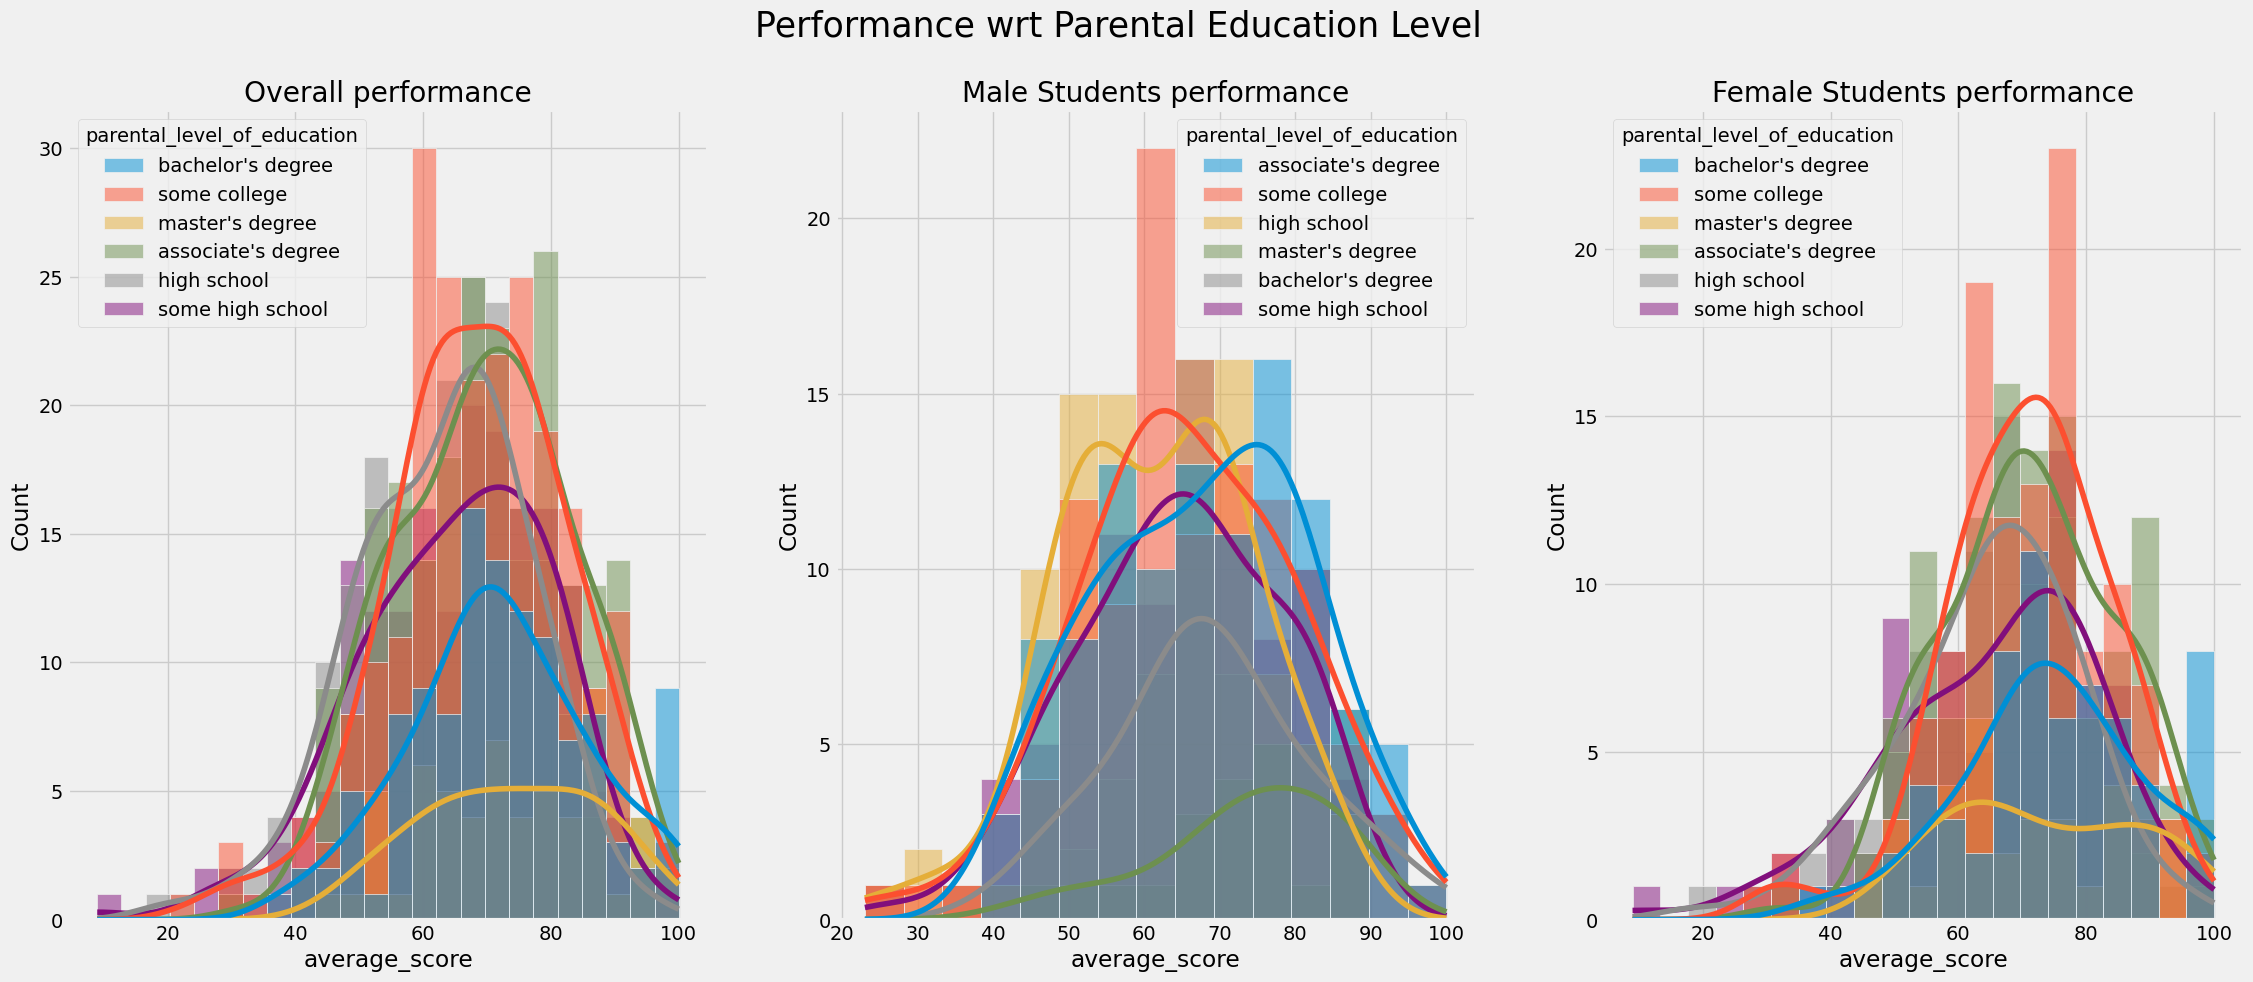

In [160]:
#Parental level Vs Scores
fig, axs = plt.subplots(1,3, figsize=(25,10))
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education', ax=axs[0])
axs[0].set_title('Overall performance')
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education', ax=axs[1])
axs[1].set_title('Male Students performance')
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education', ax=axs[2])
axs[2].set_title('Female Students performance')

plt.suptitle("Performance wrt Parental Education Level", fontsize=25)
plt.show()

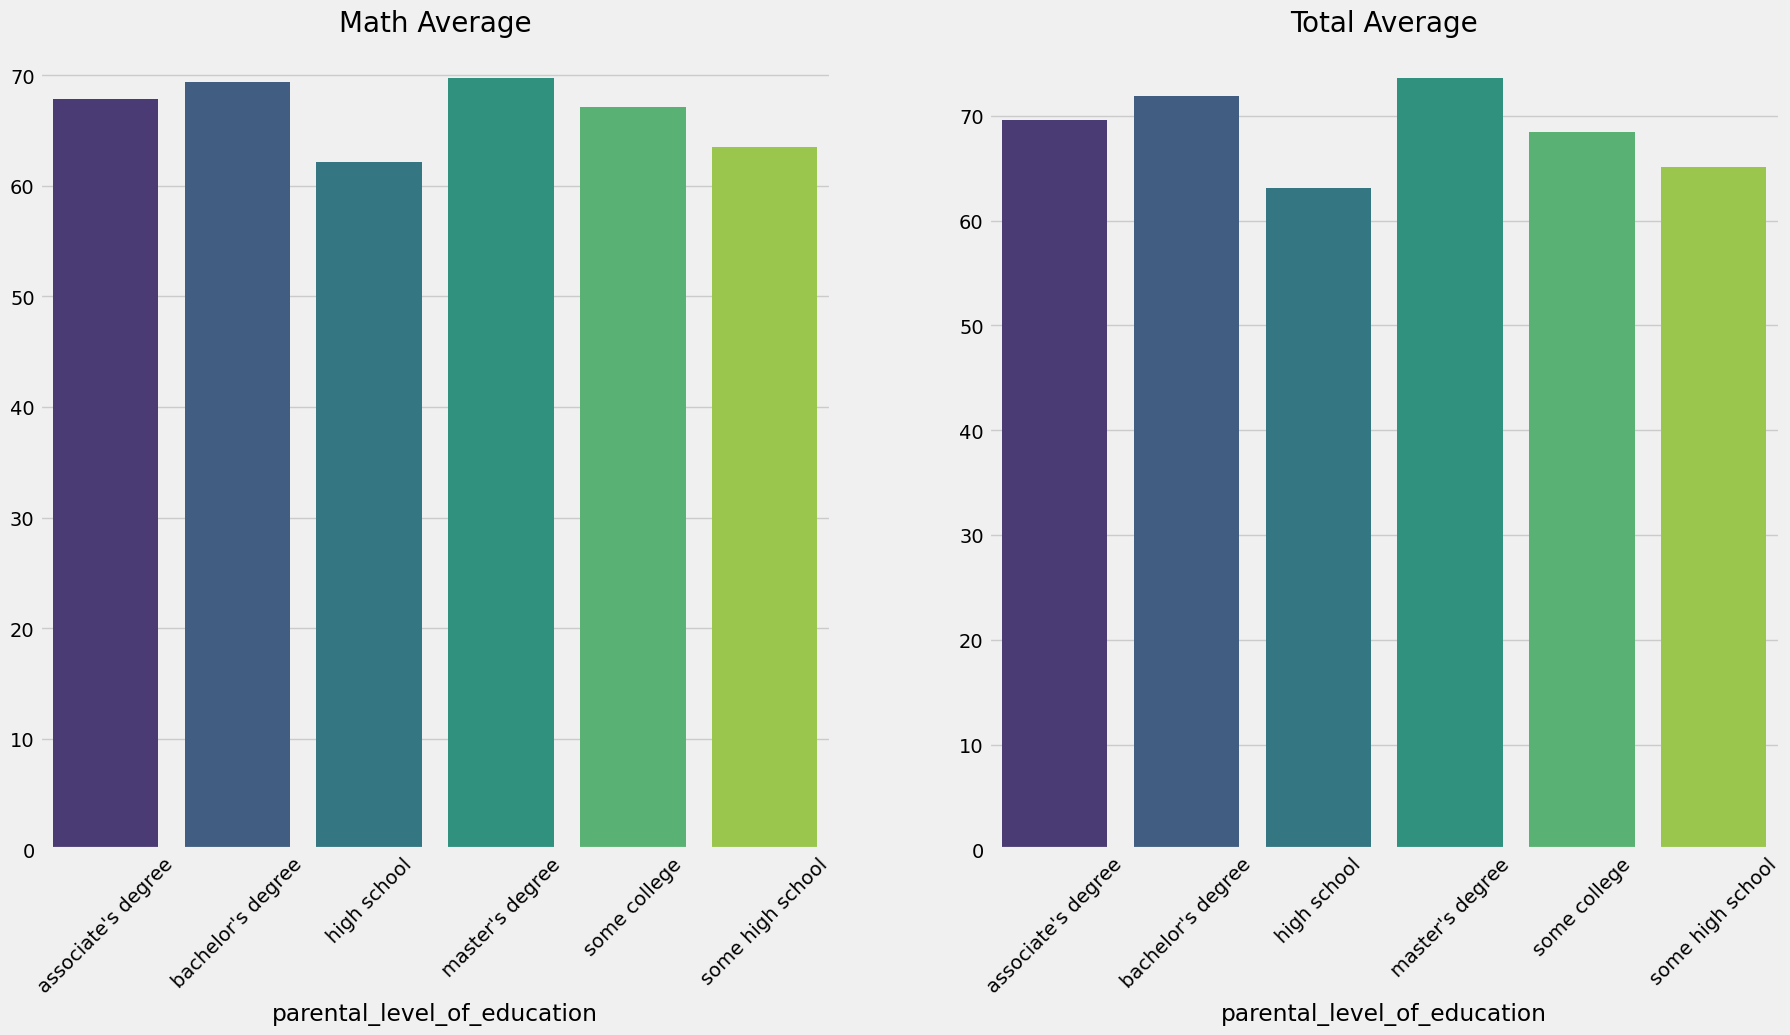

In [191]:
plevel_avg_group=df.groupby('parental_level_of_education')['average_score'].mean()
plevel_math_group=df.groupby('parental_level_of_education')['math_score'].mean()


fx, axs=plt.subplots(1,2,figsize=(20,10))
sns.barplot(x=plevel_math_group.index, y=plevel_math_group.values, palette = 'viridis',ax=axs[0])
axs[0].set_title('Math Average',size=20)

sns.barplot(x=plevel_avg_group.index, y=plevel_avg_group.values, palette = 'viridis',ax=axs[1])
axs[1].set_title('Total Average',size=20)

for i in range(2):
    axs[i].tick_params(axis='x', rotation=45)

plt.show()

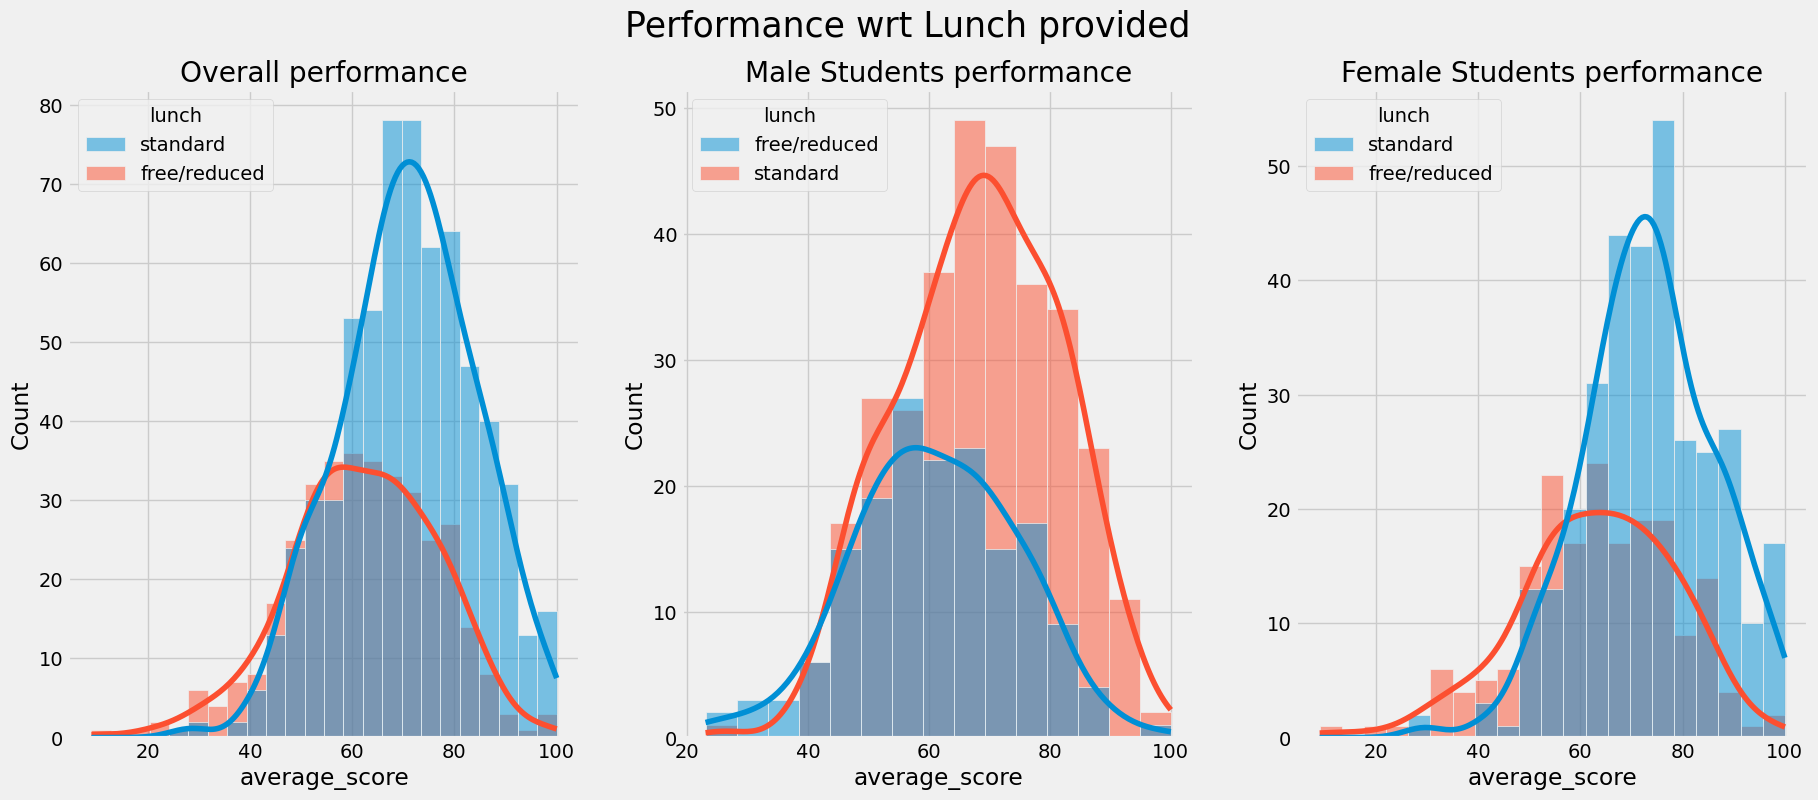

In [215]:
#Lunch vs Scores
fx, axs= plt.subplots(1,3,figsize=(20,8))
sns.histplot(data=df,x='average_score',kde=True,hue='lunch', ax=axs[0])
axs[0].set_title('Overall performance')
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch', ax=axs[1])
axs[1].set_title('Male Students performance')
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch', ax=axs[2])
axs[2].set_title('Female Students performance')

plt.suptitle("Performance wrt Lunch provided", fontsize=25)
plt.show()

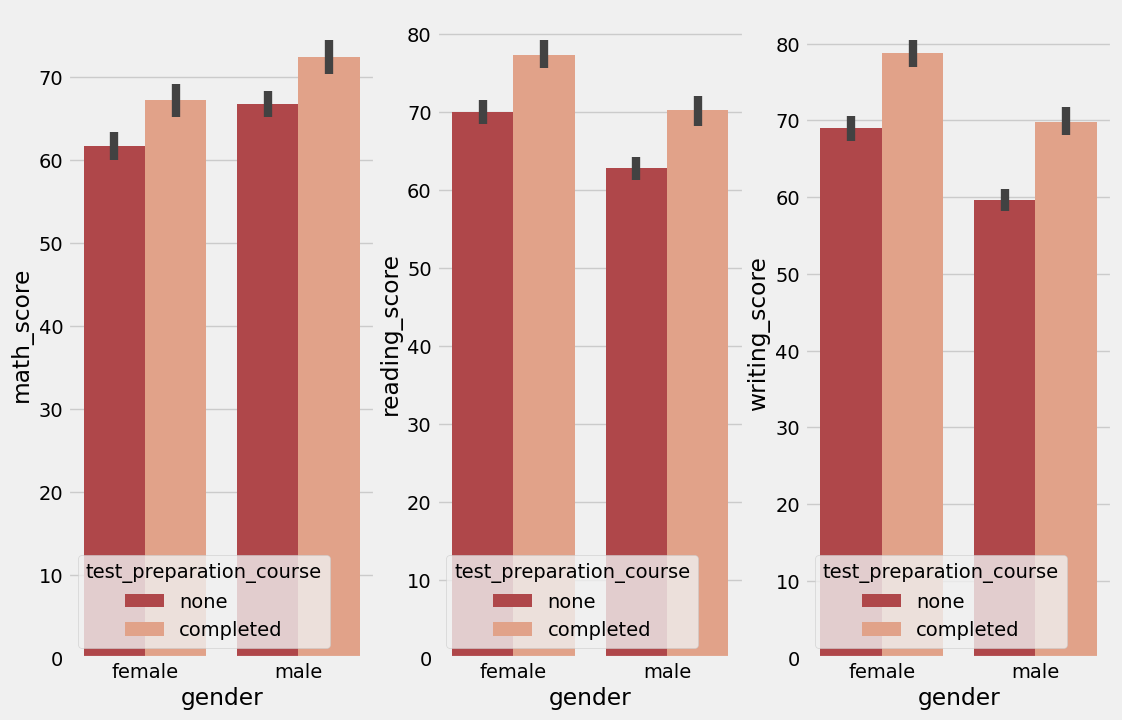

In [248]:
#Test Course Prep vs Performance
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
sns.barplot (x=df['gender'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,2)
sns.barplot (x=df['gender'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,3)
sns.barplot (x=df['gender'], y=df['writing_score'], hue=df['test_preparation_course'])

sns.set_palette("Oranges")
plt.show()

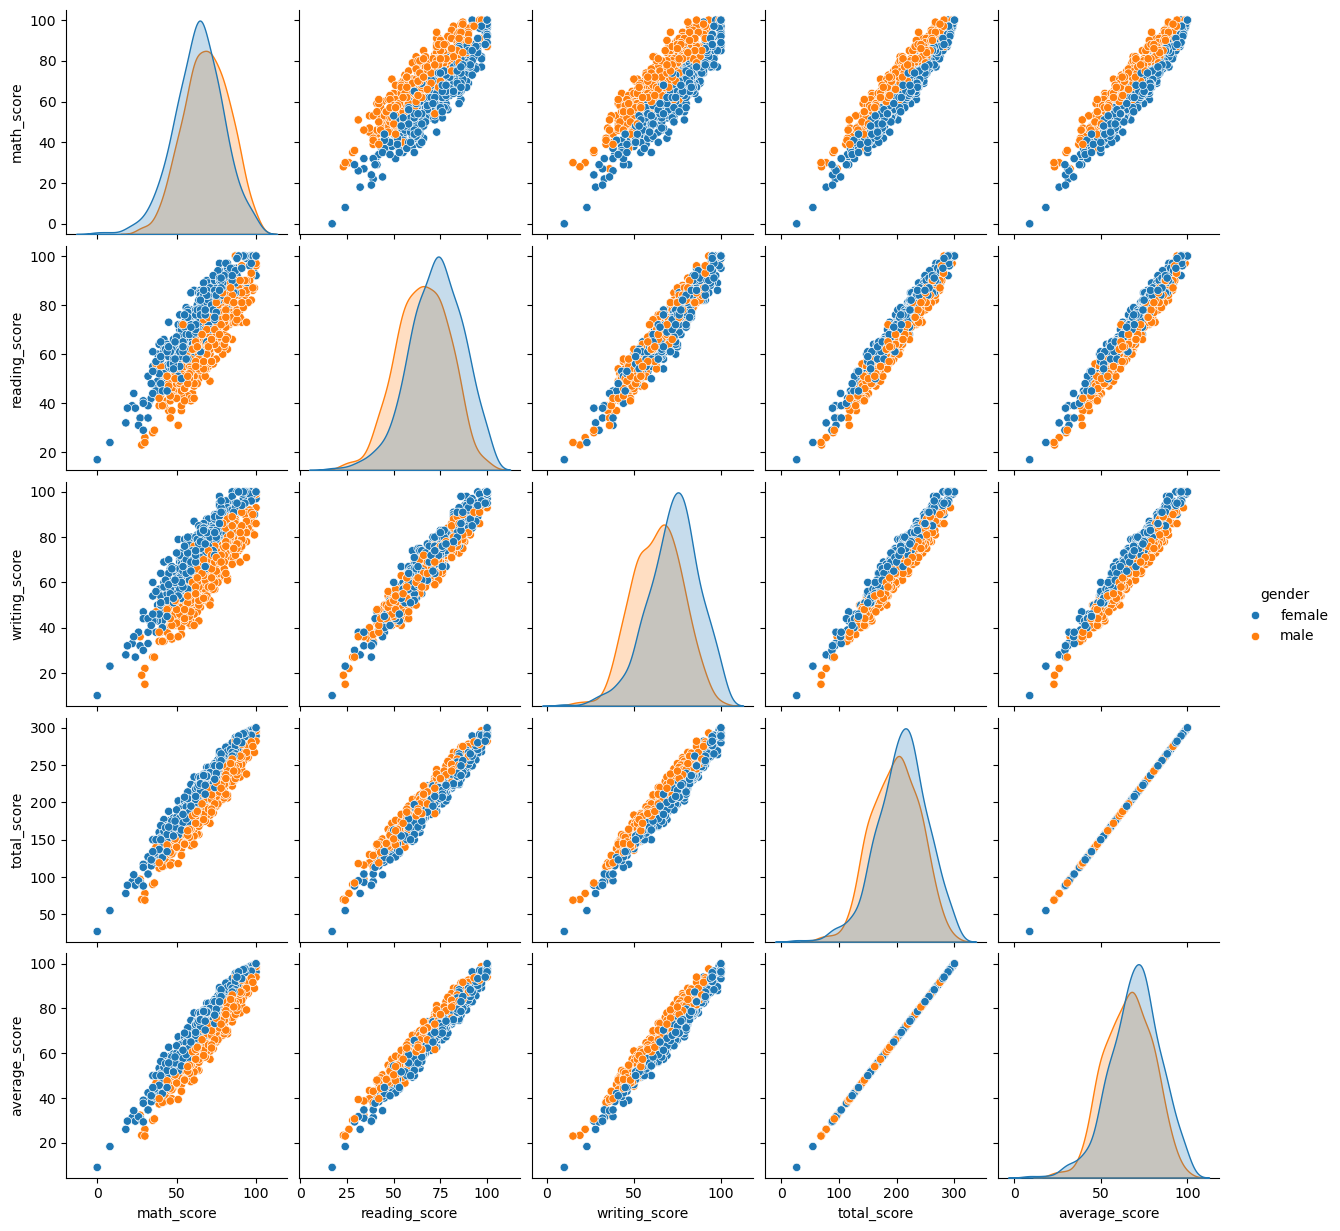

In [44]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Checking Outliers

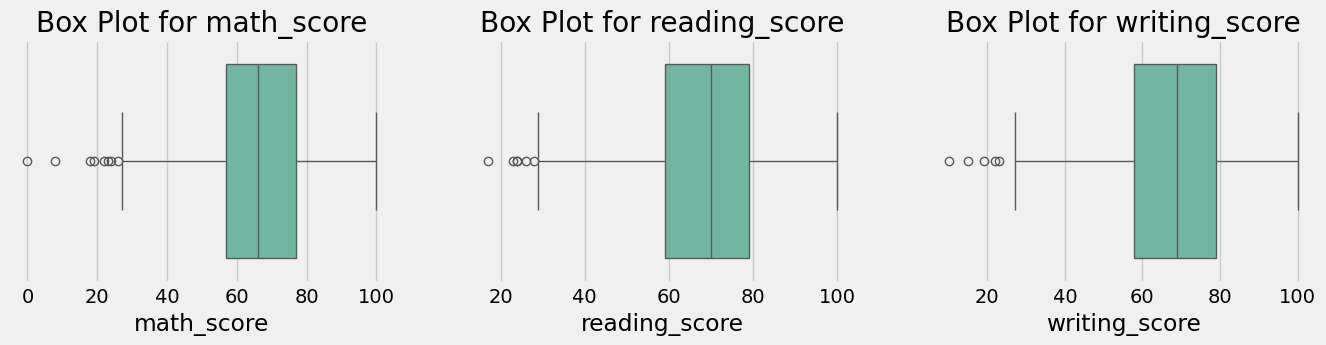

In [259]:
#numeric_features

plt.figure(figsize=(15,3))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(1,3,i)
    sns.boxplot(x=col, data=df, palette='Set2')
    plt.title(f'Box Plot for {col}')

#plt.title_layout()
plt.show()

### Feature Engineering

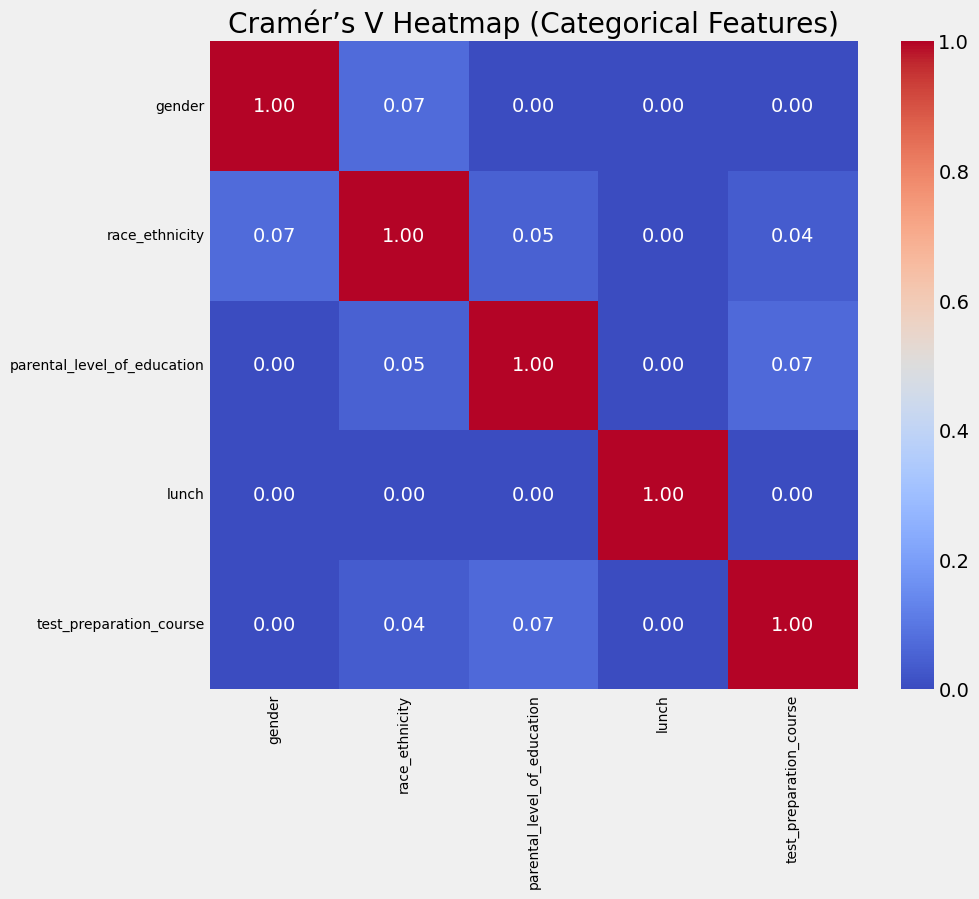

In [266]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    
    # Bias correction
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))



cramers_matrix = pd.DataFrame(
    np.zeros((len(categorical_features), len(categorical_features))),
    index=categorical_features,
    columns=categorical_features
)

for col1 in categorical_features:
    for col2 in categorical_features:
        cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])


plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Cramér’s V Heatmap (Categorical Features)")
plt.show()



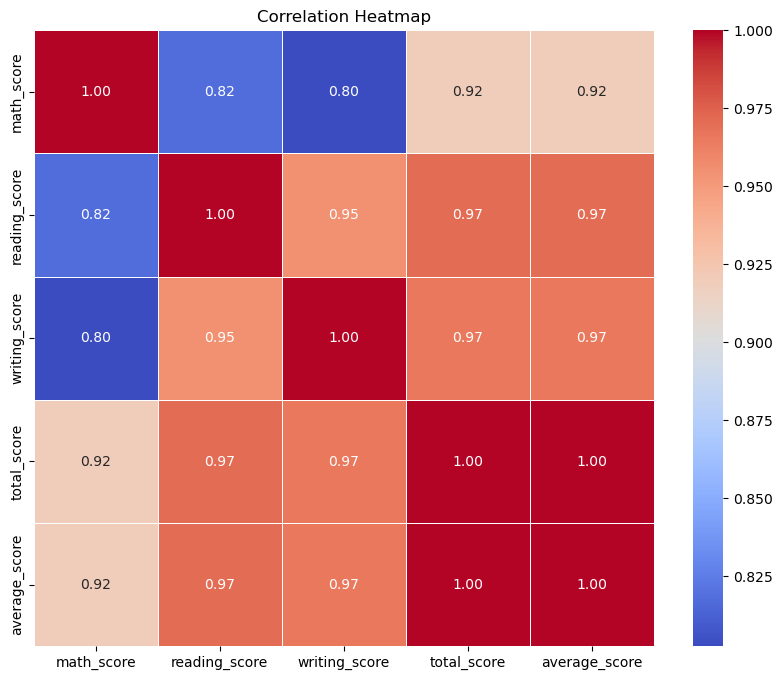

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()


In [14]:
X = df.drop(columns=['math_score','total_score', 'average_score'])
y = df['math_score']

### Modelling

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

In [16]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 7), (200, 7))

In [17]:
# Create Column Transformer
num_features = X_train.select_dtypes(exclude="object").columns
cat_features = X_train.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [18]:
X_train=preprocessor.fit_transform(X_train)

In [19]:
X_train.shape

(800, 19)

In [20]:
X_test=preprocessor.transform(X_test)

In [21]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [29]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "LGBMRegressor": LGBMRegressor()
}

model_list = []
r2_list =[]


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Evaluating
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.8326
- Mean Absolute Error: 6.1700
- R2 Score: 0.7479


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3106
- Mean Absolute Error: 1.8516
- R2 Score: 0.9763
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9837
- Mean Absolute Error: 4.5927
- R2 Score: 0.8529


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1.0073
- Mean Absolute Error: 0.6875
- R2 Score: 0.9955
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4733
- Mean Absolute Error: 5.0577
- R2 Score: 0.8278


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004812 seconds.
You can set `force_col_wise=true` to r

## Hyperparameter Tuning

In [23]:
dt_params={'max_depth': [3, 5, 7, 10, None],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4]}
rf_params={'n_estimators': [8,16,32,64,128,256],
           'max_depth': [5, 10, 15, None],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4],
           'max_features': ['sqrt', 'log2', None]}

xgb_params={'n_estimators': [8,16,32,64,128,256],
            'max_depth': [3, 5, 7, 9],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.8, 1.0],
            'colsample_bytree': [0.7, 0.8, 1.0],
            'gamma': [0, 0.1, 0.5],
            'reg_alpha': [0, 0.1, 1.0],
            'reg_lambda': [0, 1.0]}

lgbm_params={'n_estimators': [8,16,32,64,128,256],
             'max_depth': [3, 5, 7, -1],
             'num_leaves': [15, 31, 63],
             'learning_rate': [0.01, 0.05, 0.1],
             'feature_fraction': [0.8, 1.0],
             'bagging_fraction': [0.7, 0.8, 1.0],
             'min_data_in_leaf': [1, 5, 10]}


In [25]:
randomcv_models =[("Decision Tree", DecisionTreeRegressor(), dt_params),
                  ("Random Forest Regressor", RandomForestRegressor(), rf_params),
                  ("XGBRegressor", XGBRegressor(), xgb_params), 
                  ("LGBMRegressor", LGBMRegressor(), lgbm_params)]

In [26]:
##Hyperparameter Tuning

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Info] Auto-

In [31]:
## Retraining the models with best parameters
models_fin = {
    "Decision Tree": DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=2, max_depth=5),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=32, min_samples_split=10, min_samples_leaf=4, max_features=None, max_depth=None),
    "XGBRegressor": XGBRegressor(subsample=0.8, reg_lambda=0, reg_alpha=1.0, n_estimators=128, max_depth=3, learning_rate=0.05, gamma=0.5, colsample_bytree=1.0), 
    "LGBMRegressor": LGBMRegressor(num_leaves=15, n_estimators=128, min_data_in_leaf=10, max_depth=3, learning_rate=0.05, feature_fraction=0.8, bagging_fraction=1.0)
}
for i in range(len(list(models_fin))):
    model = list(models_fin.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Decision Tree
Model performance for Training set
- Root Mean Squared Error: 5.7173
- Mean Absolute Error: 4.6396
- R2 Score: 0.8550
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5400
- Mean Absolute Error: 4.9315
- R2 Score: 0.8242


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 4.4768
- Mean Absolute Error: 3.6015
- R2 Score: 0.9111
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9626
- Mean Absolute Error: 4.5147
- R2 Score: 0.8539


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 4.8817
- Mean Absolute Error: 3.9212
- R2 Score: 0.8943
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5505
- Mean Absolute Error: 4.2437
- R2 Score: 0.8734


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning]

## Pickling

In [32]:
import pickle

In [33]:
preprocessor

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [35]:
XgbCV=XGBRegressor(subsample=0.8, reg_lambda=0, reg_alpha=1.0, n_estimators=128, max_depth=3, learning_rate=0.05, gamma=0.5, colsample_bytree=1.0)
XgbCV.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [36]:
pickle.dump(preprocessor, open('preprocessor.pkl','wb'))

In [38]:
pickle.dump(XgbCV, open('XgbCV.pkl','wb'))